#PZSIB 5 - Data Analytics
## Syntax Code Python Exploratory Data Analysis
Nama: A'idah Eka Septiana

## Project Preparation

Analisis Data Carbon Dioxide


Data Source: https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt

Dalam Dataset ini terdapat beberapa kolom, yaitu:
1. `year`: Tahun saat pengukuran CO2 dilakukan.
2. `month`: Bulan saat pengukuran dilakukan.
3. `decimal_date`: Tanggal dalam format desimal yang mungkin menggambarkan tanggal pengukuran dengan lebih tepat dari pada hanya menggunakan tahun dan bulan.
4. `average`: Rata-rata konsentrasi CO2 yang diukur pada tahun dan bulan tertentu.
5. `deseasonalized`: Data rata-rata yang telah dihapuskan tren musiman atau fluktuasi untuk mengungkapkan tren jangka panjang atau perubahan yang lebih signifikan.
6. `ndays`:  Jumlah hari dalam bulan tertentu yang digunakan dalam pengukuran rata-rata CO2.
7. `sdev`: Simpangan baku (standard deviation) dari pengukuran CO2 pada tahun dan bulan tertentu, yang mengukur sejauh mana data bervariasi.
8. `unc`: Ketidakpastian (uncertainty) dalam pengukuran konsentrasi CO2.


In [ ]:
#Import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [ ]:
#Raw Dataset
df = pd.read_csv('https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt', delim_whitespace=True, skiprows = 42, header = None)

In [ ]:
#Menambahkan Nama Kolom
df.columns = ['year', 'month' , 'decimal_date', 'average', 'deseasonalized', 'ndays', 'sdev', 'unc']

In [ ]:
#Menampilkan df
df

,year,month,decimal_date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
783,2023,6,2023.4583,423.68,421.22,29,0.57,0.20
784,2023,7,2023.5417,421.83,421.45,21,0.48,0.20
785,2023,8,2023.6250,419.68,421.55,21,0.45,0.19
786,2023,9,2023.7083,418.51,421.94,18,0.30,0.14


In [ ]:
#Menampilkan Informasi DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            788 non-null    int64  
 1   month           788 non-null    int64  
 2   decimal_date    788 non-null    float64
 3   average         788 non-null    float64
 4   deseasonalized  788 non-null    float64
 5   ndays           788 non-null    int64  
 6   sdev            788 non-null    float64
 7   unc             788 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 49.4 KB


In [ ]:
#Mengkonversi Tipe Data pada 'year' dan 'month' menjadi String
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)

In [ ]:
#Menampilkan Informasi DataFrame setelah dikonversi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            788 non-null    object 
 1   month           788 non-null    object 
 2   decimal_date    788 non-null    float64
 3   average         788 non-null    float64
 4   deseasonalized  788 non-null    float64
 5   ndays           788 non-null    int64  
 6   sdev            788 non-null    float64
 7   unc             788 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 49.4+ KB


In [ ]:
#Menjadikan 'year' dan 'month' menjadi satu kesatuan dan variabel baru bernama 'Date'
df['Date'] = df['year'] + '-' + df['month']
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m')
df= df[['Date' , 'decimal_date', 'average', 'deseasonalized', 'ndays', 'sdev', 'unc']]

In [ ]:
#Menampilkan 5 DataFrame teratas
df.head()

,Date,decimal_date,average,deseasonalized,ndays,sdev,unc
0,1958-03-01,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958-04-01,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958-05-01,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958-06-01,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958-07-01,1958.5370,315.86,315.18,-1,-9.99,-0.99


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            788 non-null    datetime64[ns]
 1   decimal_date    788 non-null    float64       
 2   average         788 non-null    float64       
 3   deseasonalized  788 non-null    float64       
 4   ndays           788 non-null    int64         
 5   sdev            788 non-null    float64       
 6   unc             788 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 43.2 KB


# 1. Descriptive Statistics - Masic Measures
#### Compute the mean, median, and standard deviation for CO2 Levels

In [ ]:
df.describe()

,decimal_date,average,deseasonalized,ndays,sdev,unc
count,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000
mean,1990.999377,358.544112,358.540393,19.016497,-2.109365,-0.100178
std,18.969177,31.229801,31.173275,12.028914,4.540462,0.513312
min,1958.202700,312.430000,314.430000,-1.000000,-9.990000,-0.990000
25%,1974.604175,330.137500,330.485000,9.250000,0.157500,0.060000
50%,1991.000000,354.655000,355.145000,25.000000,0.395000,0.150000
75%,2007.395825,384.137500,383.950000,28.000000,0.560000,0.210000
max,2023.791700,424.000000,422.170000,31.000000,1.310000,0.580000


##Mean

In [ ]:
#Fungsi mean() untuk menghitung rata-rata
df.mean(axis=0,numeric_only=True)

decimal_date      1990.999377
average            358.544112
deseasonalized     358.540393
ndays               19.016497
sdev                -2.109365
unc                 -0.100178
dtype: float64

Dalam mencari nilai Mean dapat menggunakan beberapa syntax seperti:


###Decimal Date

In [ ]:
# Contoh ke - 1
decimal_date_mean = df['decimal_date'].mean()
print("Nilai Mean dari Decimal Date adalah", decimal_date_mean)

Nilai Mean dari Decimal Date adalah 1990.9993766497462


In [ ]:
# Contoh ke - 2
decimal_date_mean = df['decimal_date'].mean(axis=0, numeric_only = True)
print("Nilai Mean dari Decimal Date adalah", decimal_date_mean)

Nilai Mean dari Decimal Date adalah 1990.9993766497462


In [ ]:
# Contoh ke - 3
df[['decimal_date']].mean(axis=0, numeric_only = True)
print("Nilai Mean dari Decimal Date adalah", decimal_date_mean)

Nilai Mean dari Decimal Date adalah 1990.9993766497462


Selanjutnya saya akan mencari nilai Mean menggunakan syntax pada contoh ke - 1:

###Average

In [ ]:
average_mean = df['average'].mean()
print("Nilai Mean dari Average adalah",average_mean)

Nilai Mean dari Average adalah 358.54411167512694


###Deseasonalized

In [ ]:
deseasonalized_mean = df['deseasonalized'].mean()
print("Nilai Mean dari Deseasonalized adalah",deseasonalized_mean)

Nilai Mean dari Deseasonalized adalah 358.5403934010152


###Ndays

In [ ]:
ndays_mean = df['ndays'].mean()
print("Nilai Mean dari Ndays adalah",ndays_mean)

Nilai Mean dari Ndays adalah 19.016497461928935


###Sdev

In [ ]:
sdev_mean = df['sdev'].mean()
print("Nilai Mean dari Sdev adalah",sdev_mean)

Nilai Mean dari Sdev adalah -2.1093654822335024


###UNC

In [ ]:
unc_mean = df['unc'].mean()
print("Nilai Mean dari UNC adalah",unc_mean)

Nilai Mean dari UNC adalah -0.10017766497461929


##Median

In [ ]:
# Fungsi median() untuk menghitung nilai tengah data
df.median(axis=0, numeric_only = True)

decimal_date      1991.000
average            354.655
deseasonalized     355.145
ndays               25.000
sdev                 0.395
unc                  0.150
dtype: float64

Dalam mencari nilai Median dapat menggunakan beberapa syntax seperti:


###Decimal Date

In [ ]:
# Contoh ke - 1
decimal_date_median = df['decimal_date'].median()
print("Nilai Median dari Decimal Date adalah",decimal_date_median)

Nilai Median dari Decimal Date adalah 1991.0


In [ ]:
# Contoh ke - 2
decimal_date_median = df['decimal_date'].median(axis=0, numeric_only = True)
print("Nilai Median dari Decimal Date adalah",decimal_date_median)

Nilai Median dari Decimal Date adalah 1991.0


In [ ]:
# Contoh ke - 3
df['decimal_date'].median(axis=0, numeric_only = True)
print("Nilai Median dari Decimal Date adalah",decimal_date_median)

Nilai Median dari Decimal Date adalah 1991.0


Selanjutnya saya akan mencari nilai Median menggunakan syntax pada contoh ke - 2:

###Average

In [ ]:
average_median = df['average'].median(axis=0, numeric_only = True)
print("Nilai Median dari Average adalah",average_median)

Nilai Median dari Average adalah 354.655


###Deseasonalized

In [ ]:
deseasonalized_median = df['deseasonalized'].median(axis=0, numeric_only = True)
print("Nilai Median dari deseasonalized adalah",deseasonalized_median)

Nilai Median dari deseasonalized adalah 355.145


###Ndays

In [ ]:
ndays_median = df['ndays'].median(axis=0, numeric_only = True)
print("Nilai Median dari Ndays adalah",ndays_median)

Nilai Median dari Ndays adalah 25.0


###Sdev

In [ ]:
sdev_median = df['sdev'].median(axis=0, numeric_only = True)
print("Nilai Median dari Sdev adalah",sdev_median)

Nilai Median dari Sdev adalah 0.395


###UNC

In [ ]:
unc_median = df['unc'].median(axis=0, numeric_only = True)
print("Nilai Median dari UNC adalah",unc_median)

Nilai Median dari UNC adalah 0.15


##Standard Deviation

In [ ]:
# Fungsi std() untuk menghitung standar deviasi atau sebaran data.
df.std(axis=0, numeric_only = True)

decimal_date      18.969177
average           31.229801
deseasonalized    31.173275
ndays             12.028914
sdev               4.540462
unc                0.513312
dtype: float64

Dalam mencari nilai Median dapat menggunakan beberapa syntax seperti:

###Decimal Date

In [ ]:
# Contoh ke - 1
decimal_date_std = df['decimal_date'].std()
print("Nilai Standard Deviation dari Desimal Date adalah",decimal_date_std)

Nilai Standard Deviation dari Desimal Date adalah 18.969177497596913


In [ ]:
# Contoh ke - 2
df['decimal_date'].std()
print("Nilai Standard Deviation dari Desimal Date adalah",decimal_date_std)

Nilai Standard Deviation dari Desimal Date adalah 18.969177497596913


In [ ]:
# Contoh ke - 3
df[['decimal_date']].std()
print("Nilai Standard Deviation dari Desimal Date adalah",decimal_date_std)

Nilai Standard Deviation dari Desimal Date adalah 18.969177497596913


Selanjutnya saya akan mencari nilai Mean menggunakan syntax pada contoh ke - 3:

###Average

In [ ]:
average_std = df[['average']].std()
print("Nilai Standard Deviation dari Average Date adalah",average_std)

Nilai Standard Deviation dari Average Date adalah average    31.229801
dtype: float64


###Deseasonalized

In [ ]:
deseasonalized_std = df[['deseasonalized']].std()
print("Nilai Standard Deviation dari Deseasonalized Date adalah",deseasonalized_std)

Nilai Standard Deviation dari Deseasonalized Date adalah deseasonalized    31.173275
dtype: float64


###Ndays

In [ ]:
ndays_std = df[['ndays']].std()
print("Nilai Standard Deviation dari Deseasonalized Date adalah",ndays_std)

Nilai Standard Deviation dari Deseasonalized Date adalah ndays    12.028914
dtype: float64


###Sdev

In [ ]:
sdev_std = df[['sdev']].std()
print("Nilai Standard Deviation dari Deseasonalized Date adalah",sdev_std)

Nilai Standard Deviation dari Deseasonalized Date adalah sdev    4.540462
dtype: float64


###UNC

In [ ]:
unc_std = df[['unc']].std()
print("Nilai Standard Deviation dari Deseasonalized Date adalah",unc_std)

Nilai Standard Deviation dari Deseasonalized Date adalah unc    0.513312
dtype: float64


Diperoleh nilai Mean, Median, dan Standar Deviasi untuk kolom berikut:


1.   Desimal Date
    *   Mean: 1990.957709
    *   Median: 1990.9583
    *   Standard Deviation: 18.945122
2.   Average (Rata - rata bulanan tingkat CO2)
    *   Mean: 358.467510
    *   Median: 354.4200
    *   Standard Deviation: 31.175522
3.   Deseasonalized
    *   Mean: 358.459479
    *   Median: 355.1100
    *   Standard Deviation: 31.110256
4.   Ndays (Jumlah Hari yang diamati)
    *   Mean: 19.006353
    *   Median: 25.0000
    *   Standard Deviation: 12.033190
5.   Sdev
    *   Mean: -2.112605
    *   Median: 0.3900
    *   Standard Deviation: 4.542438
6.   UNC
    *   Mean: -0.100521
    *   Median: 0.1500
    *   Standard Deviation: 0.513548



##Data Filtering

In [ ]:
#Filter DataFrame Negatif
df_negative = df[(df['sdev'] < 0) | (df['unc'] < 0)]
df_negative

,Date,decimal_date,average,deseasonalized,ndays,sdev,unc
0,1958-03-01,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958-04-01,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958-05-01,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958-06-01,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958-07-01,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...
191,1974-02-01,1974.1260,330.71,330.05,-1,-9.99,-0.99
192,1974-03-01,1974.2027,331.48,330.14,-1,-9.99,-0.99
193,1974-04-01,1974.2877,332.65,330.22,-1,-9.99,-0.99
213,1975-12-01,1975.9583,330.76,331.72,-1,-9.99,0.00


In [ ]:
#Filter Dataframe ndays, sdev, dan unc lebih besar sama dengan nol
df_non_negative = df[(df['ndays'] >= 0) & (df['sdev'] >= 0) & (df['unc'] >= 0)]
df_non_negative

,Date,decimal_date,average,deseasonalized,ndays,sdev,unc
194,1974-05-01,1974.3750,333.18,330.21,13,0.31,0.16
195,1974-06-01,1974.4583,332.20,329.79,25,0.37,0.14
196,1974-07-01,1974.5417,331.07,330.21,24,0.24,0.09
197,1974-08-01,1974.6250,329.15,330.54,26,0.31,0.12
198,1974-09-01,1974.7083,327.33,330.44,22,0.47,0.19
...,...,...,...,...,...,...,...
783,2023-06-01,2023.4583,423.68,421.22,29,0.57,0.20
784,2023-07-01,2023.5417,421.83,421.45,21,0.48,0.20
785,2023-08-01,2023.6250,419.68,421.55,21,0.45,0.19
786,2023-09-01,2023.7083,418.51,421.94,18,0.30,0.14


In [ ]:
df_non_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 194 to 787
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            592 non-null    datetime64[ns]
 1   decimal_date    592 non-null    float64       
 2   average         592 non-null    float64       
 3   deseasonalized  592 non-null    float64       
 4   ndays           592 non-null    int64         
 5   sdev            592 non-null    float64       
 6   unc             592 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 37.0 KB


In [ ]:
#Menampilkan Deskripsi Data Data Frame non Negatif
df_non_negative.describe()

,decimal_date,average,deseasonalized,ndays,sdev,unc
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,1999.147382,370.679392,370.685236,25.638514,0.499764,0.191081
std,14.280905,26.405168,26.322347,4.008587,0.193344,0.077168
min,1974.375000,327.280000,329.790000,7.000000,0.150000,0.060000
25%,1986.854175,348.550000,348.270000,24.000000,0.357500,0.137500
50%,1999.166650,367.670000,368.260000,26.500000,0.470000,0.180000
75%,2011.479150,392.140000,391.740000,29.000000,0.600000,0.230000
max,2023.791700,424.000000,422.170000,31.000000,1.310000,0.580000


###Ndays

In [ ]:
#Mencari nilai Mean
ndays_mean = df_non_negative['ndays'].mean()
print("Nilai Mean dari Ndays adalah",ndays_mean)

Nilai Mean dari Ndays adalah 25.638513513513512


In [ ]:
#Mencari nilai Median
ndays_median = df_non_negative['ndays'].median()
print("Nilai Median dari Ndays adalah",ndays_median)

Nilai Median dari Ndays adalah 26.5


In [ ]:
#Mencari nilai Standard Deviation
ndays_std = df_non_negative['ndays'].std()
print("Nilai Standard Deviation dari Ndays adalah",ndays_std)

Nilai Standard Deviation dari Ndays adalah 4.008586784215264


###Sdev

In [ ]:
#Mencari nilai Mean
sdev_mean = df_non_negative['sdev'].mean()
print("Nilai Mean dari Sdev adalah",sdev_mean)

Nilai Mean dari Sdev adalah 0.49976351351351356


In [ ]:
#Mencari nilai Median
sdev_median = df_non_negative['sdev'].median()
print("Nilai Median dari Sdev adalah",sdev_median)

Nilai Median dari Sdev adalah 0.47


In [ ]:
#Mencari nilai Standard Deviation
sdev_std = df_non_negative['sdev'].std()
print("Nilai Standard Deviation dari Sdev adalah",sdev_std)

Nilai Standard Deviation dari Sdev adalah 0.19334427397084417


###UNC

In [ ]:
#Mencari nilai Mean
unc_mean = df_non_negative['unc'].mean()
print("Nilai Mean dari UNC adalah ", unc_mean)

Nilai Mean dari UNC adalah  0.1910810810810811


In [ ]:
#Mencari nilai Median
unc_median = df_non_negative['unc'].median()
print("Nilai Median dari UNC adalah ", unc_median)

Nilai Median dari UNC adalah  0.18


In [ ]:
#Mencari nilai Standard Deviation
unc_std = df_non_negative['unc'].std()
print("Nilai Standard Deviation dari UNC adalah ", unc_std)

Nilai Standard Deviation dari UNC adalah  0.07716758421985516


Setelah di filter diperoleh nilai Mean, Median, dan Standar Deviasi untuk kolom berikut:


1.   Desimal Date
    *   Mean: 1999.105682
    *   Median: 1999.125000
    *   Standard Deviation: 14.256885
2.   Average (Rata - rata bulanan tingkat CO2)
    *   Mean: 370.597919
    *   Median: 367.360000
    *   Standard Deviation: 26.352999
3.   Deseasonalized
    *   Mean: 370.598020
    *   Median: 368.240000
    *   Standard Deviation: 26.259062
4.   Ndays (Jumlah Hari yang diamati)
    *   Mean: 25.63621
    *   Median: 26.00000
    *   Standard Deviation: 4.01159
5.   Sdev
    *   Mean: 0.499865
    *   Median: 0.470000
    *   Standard Deviation: 0.193492
6.   UNC
    *   Mean: 0.191117
    *   Median: 0.180000
    *   Standard Deviation: 0.077235



# 2. Exploratory Data Analysis with Python I - Univariate Analysis
#### Visualize the distribution of CO2 Levels through plots like histograms or density plots.

## Histogram

###Average

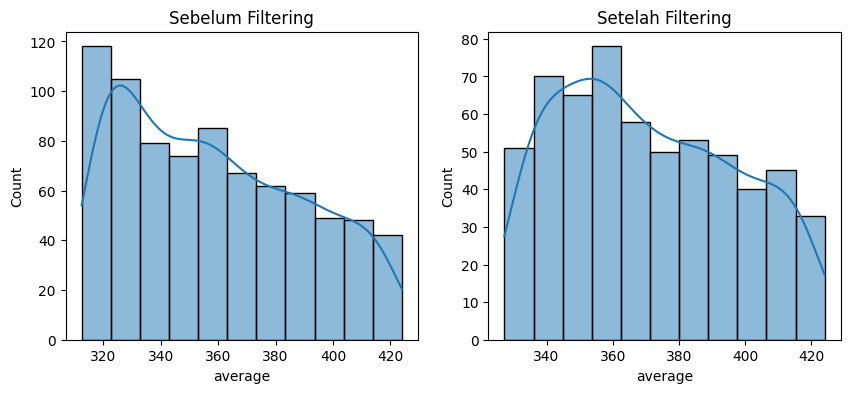

In [ ]:
# Mengatur Ukuran Histogram
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Membuat Plot Disribusi dari kolom Average pada DataFrame df
sns.histplot(ax=ax[0], data=df, x='average', kde=True)
# Membuat Plot Disribusi dari kolom Average pada DataFrame df_non_negative
sns.histplot(ax=ax[1], data=df_non_negative, x='average', kde=True)

# Membuat Judul Pada Plot DataFrame df
ax[0].set_title('Sebelum Filtering')
# Membuat Judul Pada Plot DataFrame df_non_negative
ax[1].set_title('Setelah Filtering')

# Menampilkan Plot
plt.show()

Berdasakan 2 Histogram di atas, persebaran data tidak terdapat outlier atau nilai ekstrim.  Distribusi Data diatas terlihat bahwa Puncak terletak disekitar nilai Rata - Rata Konsentrasi CO2, sehingga hal ini menunjukkan bahwa data berdistribusi normal.

###Deseasonalized

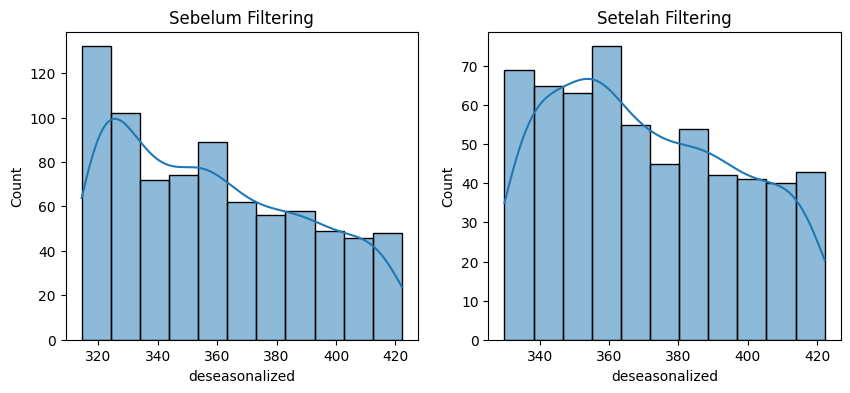

In [ ]:
# Mengatur Ukuran Histogram
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Membuat Plot Disribusi dari kolom Deseasonalized pada DataFrame df
sns.histplot(ax=ax[0], data=df, x='deseasonalized', kde=True)
# Membuat Plot Disribusi dari kolom Deseasonalized pada DataFrame df_non_negative
sns.histplot(ax=ax[1], data=df_non_negative, x='deseasonalized', kde=True)

# Membuat Judul Pada Plot DataFrame df
ax[0].set_title('Sebelum Filtering')
# Membuat Judul Pada Plot DataFrame df_non_negative
ax[1].set_title('Setelah Filtering')

# Menampilkan Plot
plt.show()

Berdasakan 2 Histogram di atas, persebaran data tidak terdapat outlier atau nilai ekstrim.  Distribusi Data diatas terlihat bahwa Puncak terletak disekitar nilai Rata - Rata Konsentrasi CO2, sehingga hal ini menunjukkan bahwa data berdistribusi normal.

###Ndays

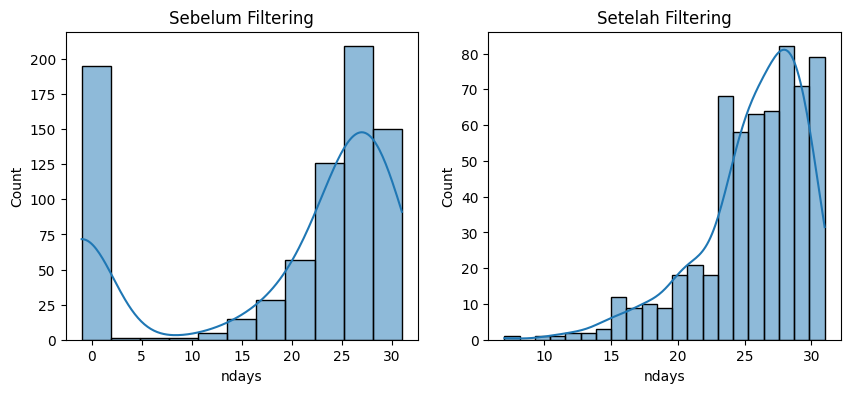

In [ ]:
# Mengatur Ukuran Histogram
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Membuat Plot Disribusi dari kolom ndays pada DataFrame df
sns.histplot(ax=ax[0], data=df, x='ndays', kde=True)
# Membuat Plot Disribusi dari kolom ndays pada DataFrame df_non_negative
sns.histplot(ax=ax[1], data=df_non_negative, x='ndays', kde=True)

# Membuat Judul Pada Plot DataFrame df
ax[0].set_title('Sebelum Filtering')
# Membuat Judul Pada Plot DataFrame df_non_negative
ax[1].set_title('Setelah Filtering')

# Menampilkan Plot
plt.show()

Berdasakan 2 Histogram di atas:

*  **Histogram Sebelum Filtering:**

  Histogram yang diberi judul "Sebelum Filtering" menggambarkan kolom `ndays` pada dataframe `df`. Pada histogram ini terlihat adanya outlier yang terletak di sisi kiri distribusi. Outlier-outlier ini menunjukkan adanya nilai-nilai ekstrem yang berada jauh di bawah nilai-nilai mayoritas. Hal ini dapat mengindikasikan keberadaan data berbeda dalam sampel sebelum filtering.

*  **Histogram Setelah Filtering:**

  Histogram yang diberi judul "Setelah Filtering" menggambarkan kolom `ndays` pada dataframe `df_non_negative`. Setelah filtering, terlihat bahwa nilai-nilai ekstrem yang sebelumnya ada dalam data 'df' telah dihilangkan. Pada histogram ini, menunjukkan bahwa tingkat `ndays` lebih simetris dengan puncak yang lebih terpusat pada value 25 - 30 terlihat lebih terkonsentrasi di sekitar nilai tengah yang cenderung berdistribusi normal.

###Sdev

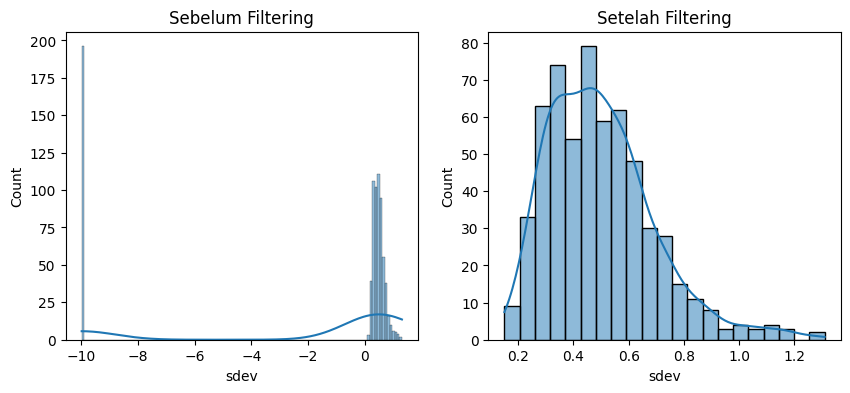

In [ ]:
# Mengatur Ukuran Histogram
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Membuat Plot Disribusi dari kolom Sdev pada DataFrame df
sns.histplot(ax=ax[0], data=df, x='sdev', kde=True)
# Membuat Plot Disribusi dari kolom Sdev pada DataFrame df_non_negative
sns.histplot(ax=ax[1], data=df_non_negative, x='sdev', kde=True)

# Membuat Judul Pada Plot DataFrame df
ax[0].set_title('Sebelum Filtering')
# Membuat Judul Pada Plot DataFrame df_non_negative
ax[1].set_title('Setelah Filtering')

# Menampilkan Plot
plt.show()

Berdasakan 2 Histogram di atas:

*  **Histogram Sebelum Filtering:**

  Histogram yang diberi judul "Sebelum Filtering" menggambarkan kolom `sdev` pada dataframe `sdev`. Pada histogram ini terlihat adanya outlier yang terletak di sisi kiri distribusi. Outlier-outlier ini menunjukkan adanya nilai-nilai ekstrem yang berada jauh di bawah nilai-nilai mayoritas. Hal ini dapat mengindikasikan keberadaan data berbeda dalam sampel sebelum filtering.

*  **Histogram Setelah Filtering:**

  Histogram yang diberi judul "Setelah Filtering" menggambarkan kolom `sdev` pada dataframe `df_non_negative`. Setelah filtering, terlihat bahwa nilai-nilai ekstrem yang sebelumnya ada dalam data 'df' telah dihilangkan. Setelah nilai outlier dihilangkan terlihat persebaran data lebih rapih, dan menunjukkan bahwa tingkat `sdev` lebih simetris dengan puncak yang lebih terpusat pada value 0.4 - 0.6 terlihat lebih terkonsentrasi di sekitar nilai tengah.

###UNC

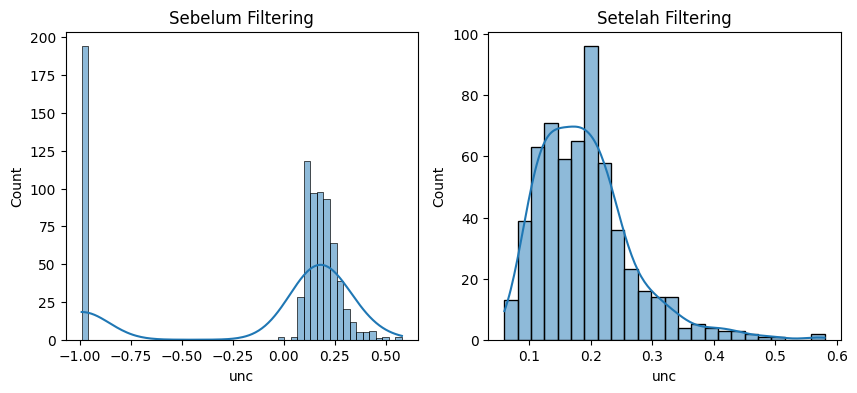

In [ ]:
# Mengatur Ukuran Histogram
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Membuat Plot Disribusi dari kolom UNC pada DataFrame df
sns.histplot(ax=ax[0], data=df, x='unc', kde=True)
# Membuat Plot Disribusi dari kolom UNC pada DataFrame df_non_negative
sns.histplot(ax=ax[1], data=df_non_negative, x='unc', kde=True)

# Membuat Judul Pada Plot DataFrame df
ax[0].set_title('Sebelum Filtering')
# Membuat Judul Pada Plot DataFrame df_non_negative
ax[1].set_title('Setelah Filtering')

# Menampilkan Plot
plt.show()

Berdasakan 2 Histogram di atas:

*  **Histogram Sebelum Filtering:**

  Histogram yang diberi judul "Sebelum Filtering" menggambarkan kolom `unc` pada dataframe `unc`. Pada histogram ini terlihat adanya outlier yang terletak di sisi kiri distribusi. Outlier-outlier ini menunjukkan adanya nilai-nilai ekstrem yang berada jauh di bawah nilai-nilai mayoritas. Hal ini dapat mengindikasikan keberadaan data berbeda dalam sampel sebelum filtering.

*  **Histogram Setelah Filtering:**

  Histogram yang diberi judul "Setelah Filtering" menggambarkan kolom `unc` pada dataframe `df_non_negative`. Setelah filtering, terlihat bahwa nilai-nilai ekstrem yang sebelumnya ada dalam data 'df' telah dihilangkan. Setelah nilai outlier dihilangkan terlihat persebaran data lebih rapih, dan menunjukkan bahwa tingkat `unc` dengan puncak yang lebih terpusat pada value 0.1 - 0.2 terlihat lebih terkonsentrasi di sekitar nilai tengah yang cenderung berdistribusi normal.

# 3. Exploratory Data Analysis with Python II - Bivariate Analysis
#### Investigate the relationship between Year and CO2 Levels using scatter plots, line plots, or correlation matrices.

##Scatterplot

Bivariate menggunakan Scatterplot

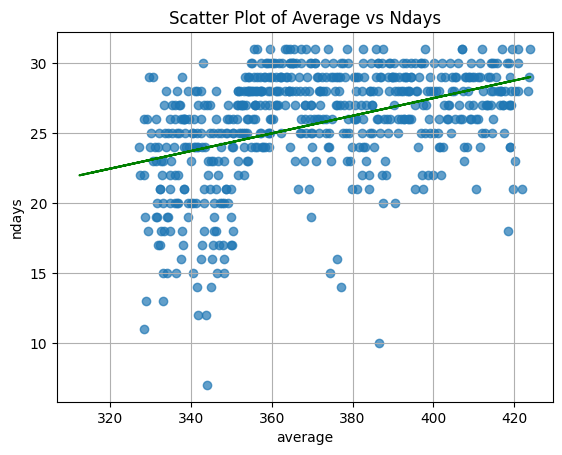

In [ ]:
# Membuat Scatterplot dari Variabel Average dan Ndays pada DataFrame Non Negatif
plt.scatter(df_non_negative['average'],df_non_negative['ndays'], alpha=0.7, label='Data Points')

# Calculate the line of best fit
slope, intercept = np.polyfit(df_non_negative['average'], df_non_negative['ndays'], 1)
x = np.array(df['average'])
y = slope * x + intercept

# Membuat Garis Regresi dalam Grafik
plt.plot(x, y, color='green', label=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})')

# Membuat Judul Pada Plot
plt.title('Scatter Plot of Average vs Ndays')

# Membuat Label pada Sumbu X (Horizontal) pada Plot
plt.xlabel('average')

# Membuat Label pada Sumbu Y (Vertikal) pada Plot
plt.ylabel('ndays')

# Mengaktifkan tampilan grid pada plot
plt.grid(True)

# Menampilkan Plot
plt.show()

Berdasarkan Visualisasi di atas Korelasi antara variabel `ndays` dan `average` adalah lemah atau tidak ada korelasi.

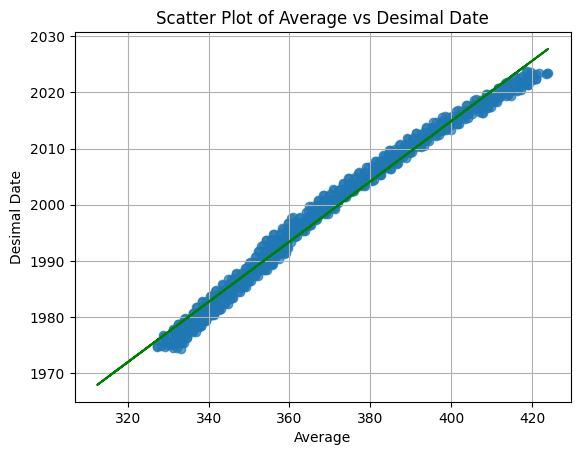

In [ ]:
# Membuat Scatterplot dari Variabel Average dan Decimal Date pada DataFrame Non Negatif
plt.scatter(df_non_negative['average'],df_non_negative['decimal_date'], alpha=0.7, label='Data Points')

# Calculate the line of best fit
slope, intercept = np.polyfit(df_non_negative['average'], df_non_negative['decimal_date'], 1)
x = np.array(df['average'])
y = slope * x + intercept

# Membuat Garis Regresi dalam Grafik
plt.plot(x, y, color='green', label=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})')

# Membuat Judul Pada Plot
plt.title('Scatter Plot of Average vs Desimal Date')

# Membuat Label pada Sumbu X (Horizontal) pada Plot
plt.xlabel('Average')

# Membuat Label pada Sumbu Y (Vertikal) pada Plot
plt.ylabel('Desimal Date')

# Mengaktifkan tampilan grid pada plot
plt.grid(True)

# Menampilkan Plot
plt.show()

Berdasarkan Visualisasi di atas Korelasi antara variabel `decimal_date` dan `average` menunjukkan korelasi positif yang sangat kuat.

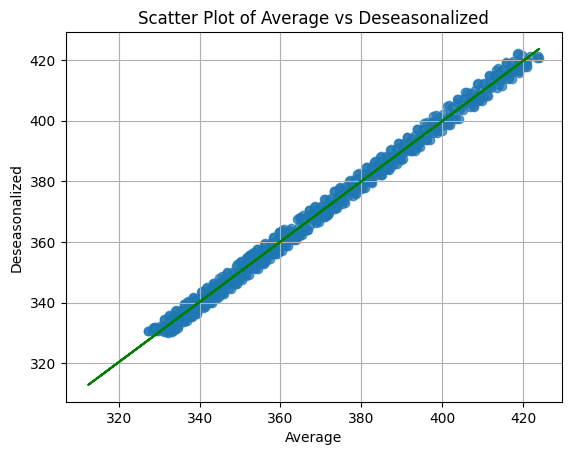

In [ ]:
# Membuat Scatterplot dari Variabel Average dan Deseasonalized pada DataFrame Non Negatif
plt.scatter(df_non_negative['average'],df_non_negative['deseasonalized'], alpha=0.7, label='Data Points')

# Calculate the line of best fit
slope, intercept = np.polyfit(df_non_negative['average'], df_non_negative['deseasonalized'], 1)
x = np.array(df['average'])
y = slope * x + intercept

# Membuat Garis Regresi dalam Grafik
plt.plot(x, y, color='green', label=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})')

# Membuat Judul Pada Plot
plt.title('Scatter Plot of Average vs Deseasonalized')

# Membuat Label pada Sumbu X (Horizontal) pada Plot
plt.xlabel('Average')

# Membuat Label pada Sumbu Y (Vertikal) pada Plot
plt.ylabel('Deseasonalized')

# Mengaktifkan tampilan grid pada plot
plt.grid(True)

# Menampilkan Plot
plt.show()

Berdasarkan Visualisasi di atas Korelasi antara variabel `deseasonalized` dan `average` menunjukkan korelasi positif yang sangat kuat.

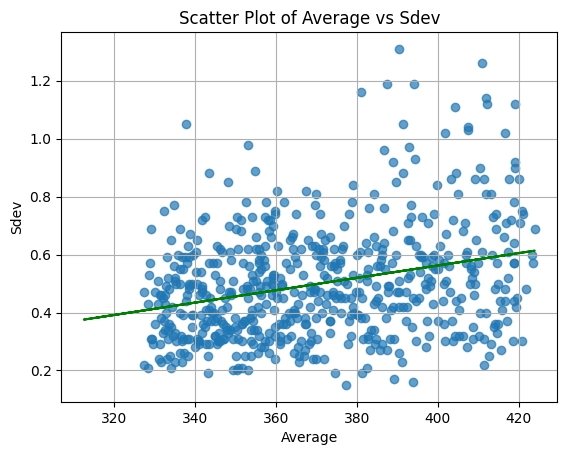

In [ ]:
# Membuat Scatterplot dari Variabel Average dan Sdev pada DataFrame Non Negatif
plt.scatter(df_non_negative['average'],df_non_negative['sdev'], alpha=0.7, label='Data Points')

# Calculate the line of best fit
slope, intercept = np.polyfit(df_non_negative['average'], df_non_negative['sdev'], 1)
x = np.array(df['average'])
y = slope * x + intercept

# Membuat Garis Regresi dalam Grafik
plt.plot(x, y, color='green', label=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})')

# Membuat Judul Pada Plot
plt.title('Scatter Plot of Average vs Sdev')

# Membuat Label pada Sumbu X (Horizontal) pada Plot
plt.xlabel('Average')

# Membuat Label pada Sumbu Y (Vertikal) pada Plot
plt.ylabel('Sdev')

# Mengaktifkan tampilan grid pada plot
plt.grid(True)

# Menampilkan Plot
plt.show()

Berdasarkan Visualisasi di atas Korelasi antara variabel `average` dan `sdev` menunjukkan korelasi yang lenah atau bahkan tidak ada korelasi.

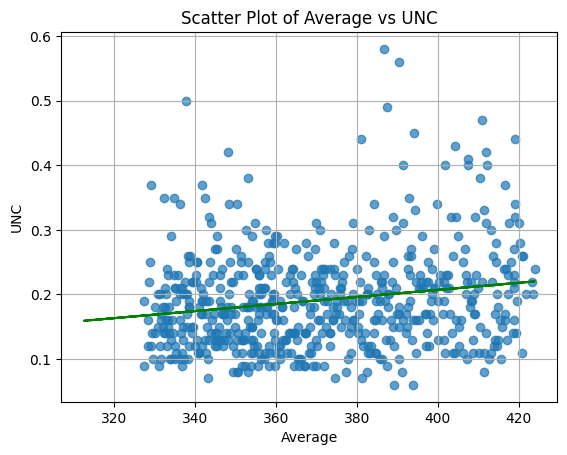

In [ ]:
# Membuat Scatterplot dari Variabel Average dan UNC pada DataFrame Non Negatif
plt.scatter(df_non_negative['average'],df_non_negative['unc'], alpha=0.7, label='Data Points')

# Calculate the line of best fit
slope, intercept = np.polyfit(df_non_negative['average'], df_non_negative['unc'], 1)
x = np.array(df['average'])
y = slope * x + intercept

# Membuat Garis Regresi dalam Grafik
plt.plot(x, y, color='green', label=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})')

# Membuat Judul Pada Plot
plt.title('Scatter Plot of Average vs UNC')

# Membuat Label pada Sumbu X (Horizontal) pada Plot
plt.xlabel('Average')

# Membuat Label pada Sumbu Y (Vertikal) pada Plot
plt.ylabel('UNC')

# Mengaktifkan tampilan grid pada plot
plt.grid(True)

# Menampilkan Plot
plt.show()

Berdasarkan Visualisasi di atas Korelasi antara variabel `average` dan `unc` menunjukkan korelasi yang lemah atau bahkan tidak ada korelasi.

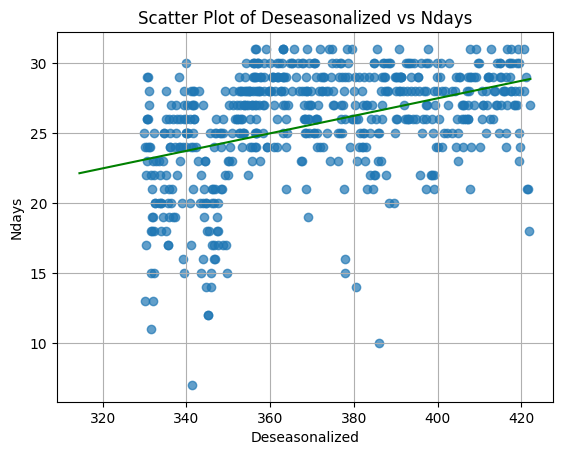

In [ ]:
# Membuat Scatterplot dari Variabel Deseasonalized dan Ndays pada DataFrame Non Negatif
plt.scatter(df_non_negative['deseasonalized'],df_non_negative['ndays'], alpha=0.7, label='Data Points')

# Calculate the line of best fit
slope, intercept = np.polyfit(df_non_negative['deseasonalized'], df_non_negative['ndays'], 1)
x = np.array(df['deseasonalized'])
y = slope * x + intercept

# Membuat Garis Regresi dalam Grafik
plt.plot(x, y, color='green', label=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})')

# Membuat Judul Pada Plot
plt.title('Scatter Plot of Deseasonalized vs Ndays')

# Membuat Label pada Sumbu X (Horizontal) pada Plot
plt.xlabel('Deseasonalized')

# Membuat Label pada Sumbu Y (Vertikal) pada Plot
plt.ylabel('Ndays')

# Mengaktifkan tampilan grid pada plot
plt.grid(True)

# Menampilkan Plot
plt.show()

Berdasarkan Visualisasi di atas Korelasi antara variabel `deseasonalized` dan `ndays` menunjukkan korelasi yang lemah.

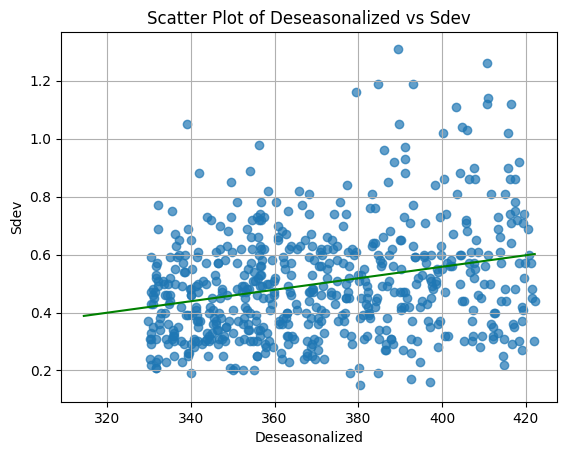

In [ ]:
# Membuat Scatterplot dari Variabel Deseasonalized dan Sdev pada DataFrame Non Negatif
plt.scatter(df_non_negative['deseasonalized'],df_non_negative['sdev'], alpha=0.7, label='Data Points')

# Calculate the line of best fit
slope, intercept = np.polyfit(df_non_negative['deseasonalized'], df_non_negative['sdev'], 1)
x = np.array(df['deseasonalized'])
y = slope * x + intercept

# Membuat Garis Regresi dalam Grafik
plt.plot(x, y, color='green', label=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})')

# Membuat Judul Pada Plot
plt.title('Scatter Plot of Deseasonalized vs Sdev')

# Membuat Label pada Sumbu X (Horizontal) pada Plot
plt.xlabel('Deseasonalized')

# Membuat Label pada Sumbu Y (Vertikal) pada Plot
plt.ylabel('Sdev')

# Mengaktifkan tampilan grid pada plot
plt.grid(True)

# Menampilkan Plot
plt.show()

Berdasarkan Visualisasi di atas Korelasi antara variabel `deseasonalized` dan `sdev` menunjukkan korelasi yang lemah atau bahkan tidak ada korelasi.

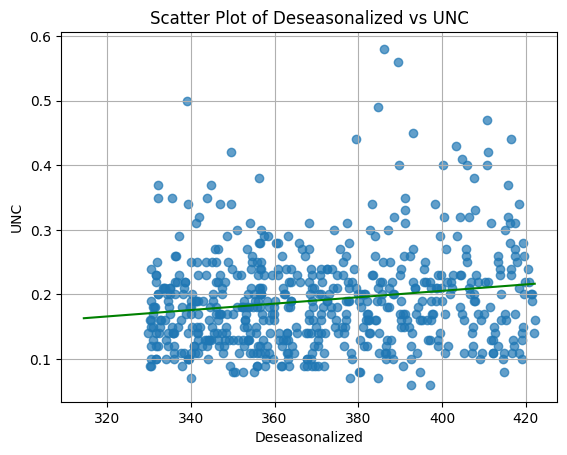

In [ ]:
# Membuat Scatterplot dari Variabel Deseasonalized dan UNC pada DataFrame Non Negatif
plt.scatter(df_non_negative['deseasonalized'],df_non_negative['unc'], alpha=0.7, label='Data Points')

# Calculate the line of best fit
slope, intercept = np.polyfit(df_non_negative['deseasonalized'], df_non_negative['unc'], 1)
x = np.array(df['deseasonalized'])
y = slope * x + intercept

# Membuat Garis Regresi dalam Grafik
plt.plot(x, y, color='green', label=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})')

# Membuat Judul Pada Plot
plt.title('Scatter Plot of Deseasonalized vs UNC')

# Membuat Label pada Sumbu X (Horizontal) pada Plot
plt.xlabel('Deseasonalized')

# Membuat Label pada Sumbu Y (Vertikal) pada Plot
plt.ylabel('UNC')

# Mengaktifkan tampilan grid pada plot
plt.grid(True)

# Menampilkan Plot
plt.show()

Berdasarkan Visualisasi di atas Korelasi antara variabel `deseasonalized` dan `unc` menunjukkan korelasi yang lemah atau bahkan tidak ada korelasi.

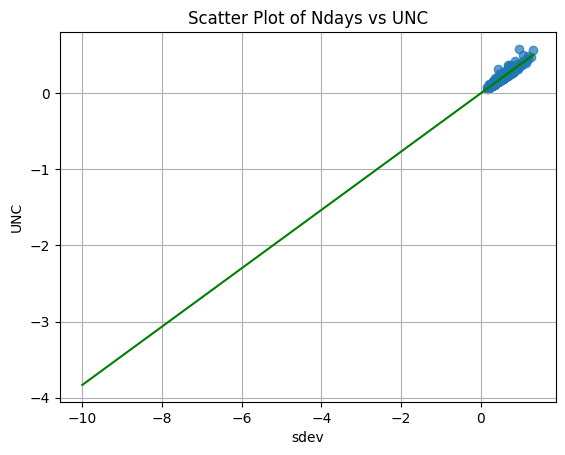

In [ ]:
# Membuat Scatterplot dari Variabel sdev dan UNC pada DataFrame Non Negatif
plt.scatter(df_non_negative['sdev'],df_non_negative['unc'], alpha=0.7, label='Data Points')

# Calculate the line of best fit
slope, intercept = np.polyfit(df_non_negative['sdev'], df_non_negative['unc'], 1)
x = np.array(df['sdev'])
y = slope * x + intercept

# Membuat Garis Regresi dalam Grafik
plt.plot(x, y, color='green', label=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})')

# Membuat Judul Pada Plot
plt.title('Scatter Plot of Ndays vs UNC')

# Membuat Label pada Sumbu X (Horizontal) pada Plot
plt.xlabel('sdev')

# Membuat Label pada Sumbu Y (Vertikal) pada Plot
plt.ylabel('UNC')

# Mengaktifkan tampilan grid pada plot
plt.grid(True)

# Menampilkan Plot
plt.show()

Korelasi antara variabel `ndays` dan `unc` menunjukkan korelasi yang cukup kuat, walaupun garis pada plot diatas tidak panjang, hal ini bisa disebabkan karena keterbatasan tertentu.

## Heatmap

In [ ]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxx
corr=df.corr()
corr

,decimal_date,average,deseasonalized,ndays,sdev,unc
decimal_date,1.000000,0.988176,0.990432,0.797476,0.752961,0.754560
average,0.988176,1.000000,0.997709,0.734953,0.683171,0.687343
deseasonalized,0.990432,0.997709,1.000000,0.735587,0.684341,0.687213
ndays,0.797476,0.734953,0.735587,1.000000,0.956936,0.936967
sdev,0.752961,0.683171,0.684341,0.956936,1.000000,0.990695
unc,0.754560,0.687343,0.687213,0.936967,0.990695,1.000000


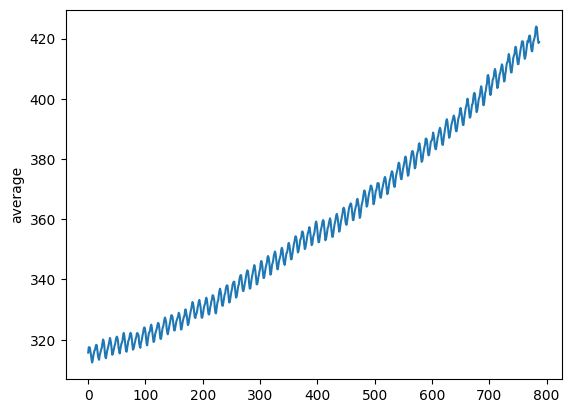

In [ ]:
#xxxxxxxxxxxxxxxxxxxx
sns.lineplot(data=df, x=df.index, y='average')
plt.show()

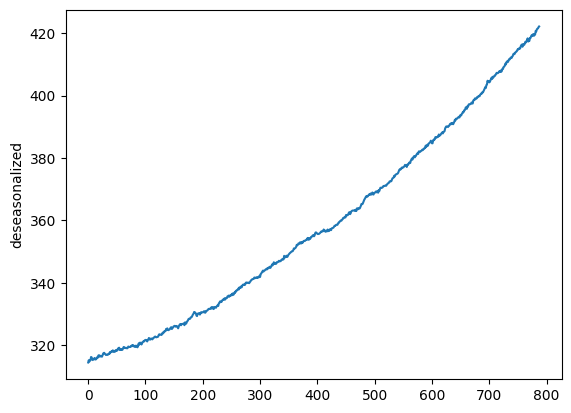

In [ ]:
#xxxxxxxxxxxxxxxxxxxx
sns.lineplot(data=df, x=df.index, y='deseasonalized')
plt.show()

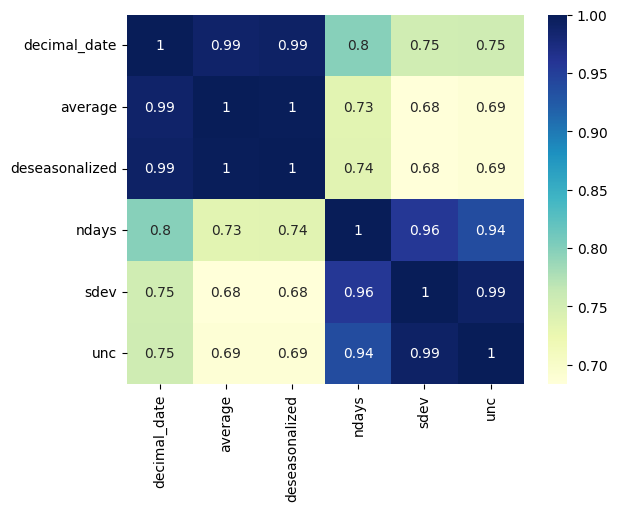

In [ ]:
# Membuat DataFrame baru dari df
df_heatmap = pd.DataFrame(df)

# Memuat heatmap Menggunakan Warna Blue dan Green
heatmap = sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

#Menampilkan Plot
plt.show()


Dari Heatmap di atas didapatkan korelasi antar variabel berikut:

*   Korelasi antara `Decimal Date` dan `Average` atau rata rata pengukukuran CO2 bernilai 0.99 yang memiliki warna hampir serupa dengan nilai 1, menandakan bahwa ada hubungan positif yang kuat antara Decimal Date dan Average.

*   Korelasi antara `Decimal Date` dan `Deseasonalized` atau rata-rata yang telah dihapuskan tren musiman bernilai 0.99 yang memiliki warna hampir serupa dengan nilai 1, menandakan bahwa ada hubungan positif yang kuat antara Decimal Date dan Deseasonalized.

*   Korelasi antara `Decimal Date` dan `ndays` atau Jumlah hari dalam bulan tertentu yang digunakan dalam pengukuran rata-rata CO2 bernilai 0.8 yang menandakan bahwa memiliki hubungan lemah antara Decimal Date dan ndays.

*   Korelasi antara `Decimal Date` dan `sdev` atau atau Simpangan baku (standard deviation) dari pengukuran CO2 bernilai 0.75 yang menandakan bahwa memiliki hubungan lemah antara Decimal Date dan sdev.

*   Korelasi antara `Decimal Date` dan `unc` atau Ketidakpastian (uncertainty) dalam pengukuran konsentrasi CO2 bernilai 0.75 yang menandakan bahwa memiliki hubungan lemah antara Decimal Date dan sdev.

*   Korelasi antara `Average` atau rata rata pengukukuran CO2 dan `Deseasonalized` atau rata-rata yang telah dihapuskan tren musiman, dalam pengukuran korelasi bernilai 1 menandakan bahwa ada hubungan positif yang sangat kuat antara Average dan Deseasonalized.

*   Korelasi antara `Average` atau rata rata pengukukuran CO2 dan `Ndays` atau Jumlah hari dalam bulan tertentu yang digunakan dalam pengukuran rata-rata CO2 memiliki nilai 0.74 yang menandakan bahwa adanya hubungan lemah antara Average dan Ndays.

*   Korelasi antara `Average` atau rata rata pengukukuran CO2 dan `Sdev` atau Simpangan baku (standard deviation) dari pengukuran CO2 memiliki nilai 0.68 yang menandakan bahwa tidak ada korelasi antara Average dan Ndays.

*   Korelasi antara `Average` atau rata rata pengukukuran CO2 dan `UNC` atau Ketidakpastian (uncertainty) dalam pengukuran memiliki nilai 0.69 yang menandakan bahwa tidak ada korelasi antara Average dan Ndays.

*   Korelasi antara `Deseasonalized` dan `Ndays` atau Jumlah hari dalam bulan tertentu yang digunakan dalam pengukuran rata-rata CO2 memiliki nilai 0.74 yang menandakan bahwa adanya hubungan lemah antara Deseasonalized dan Ndays.

*   Korelasi antara `Deseasonalized` dan `Sdev` atau Simpangan baku (standard deviation) dari pengukuran CO2 memiliki nilai 0.69 yang menandakan bahwa tidak ada korelasi antara Deseasonalized dan Sdev.

*   Korelasi antara `Deseasonalized` dan `UNC` atau Ketidakpastian (uncertainty) dalam pengukuran memiliki nilai 0.69 yang menandakan bahwa tidak ada korelasi antara Deseasonalized dan UNC.

*   Korelasi antara `Ndays` atau Jumlah hari dalam bulan tertentu yang digunakan dalam pengukuran rata-rata CO2 dan `Sdev` bernilai 0.96 yang memiliki warna hampir serupa dengan nilai 1, menandakan bahwa ada hubungan positifyang kuat antara Ndays dan Sdev.

*   Korelasi antara `Ndays` atau Jumlah hari dalam bulan tertentu yang digunakan dalam pengukuran rata-rata CO2 dan `UNC` atau Ketidakpastian (uncertainty) dalam pengukuran bernilai 0.94 yang memiliki warna hampir serupa dengan nilai 1, menandakan bahwa ada hubungan yang kuat antara Ndays dan UNC.

*   Korelasi antara `Sdev` atau Simpangan baku (standard deviation) dari pengukuran CO2 dan `UNC` atau Ketidakpastian (uncertainty) dalam pengukuran korelasi bernilai 0.99 yang memiliki warna hampir serupa dengan nilai 1, menandakan bahwa ada hubungan positif yang erat antara Sdev dan UNC.


Dapat disimpulkan bahwa `decimal_date`memiliki hubungan yang kuat terhadap `average` dan `deseasonalized` yang menunjukkan adanya pola kenaikan rata - rata CO2 seiring jalannya waktu.

## Time Series

In [ ]:
# Mengubah kolom date menjadi index

df = df.set_index('Date')
df_non_negative = df_non_negative.set_index('Date')

In [ ]:
# Resample data menjadi tahunan

df_resample =df_non_negative.resample('1Y').mean()
df_resample

,decimal_date,average,deseasonalized,ndays,sdev,unc
Date,,,,,,
1974-12-31,1974.666663,329.762500,330.346250,23.625000,0.330000,0.131250
1975-12-31,1975.458336,331.160909,331.074545,22.636364,0.419091,0.169091
1976-12-31,1976.500000,332.026667,332.027500,19.000000,0.460833,0.204167
1977-12-31,1977.500000,333.844167,333.844167,21.166667,0.390833,0.164167
1978-12-31,1978.500000,335.415000,335.415000,21.916667,0.427500,0.176667
1979-12-31,1979.500000,336.835000,336.835833,23.250000,0.482500,0.191667
1980-12-31,1980.500000,338.762500,338.765000,23.333333,0.494167,0.204167
1981-12-31,1981.500000,340.119167,340.120000,25.500000,0.410833,0.156667
1982-12-31,1982.500000,341.479167,341.477500,23.333333,0.425000,0.178333


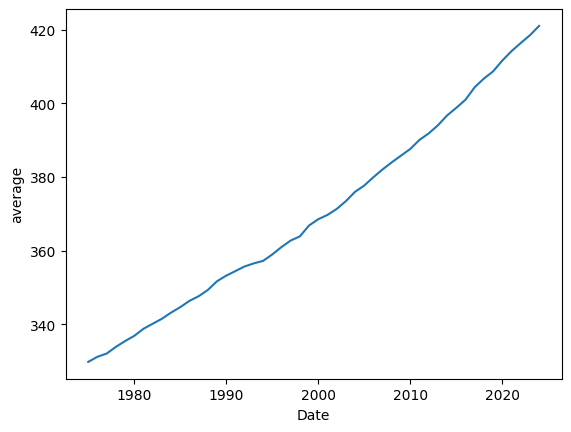

In [ ]:
# Membuat Lineplot dari variabel Average
sns.lineplot(data=df_resample, x=df_resample.index, y='average')
plt.show()

Berdasarkan Plot di atas, kita dapat melihat bahwa variabel `average` dari DataFrame df_resample menunjukkan adanya peningkatan seiring berjalannya waktu. Ini mengindikasikan perubahan rata-rata konsentrasi CO2 dari awal hingga akhir periode yang diamati.

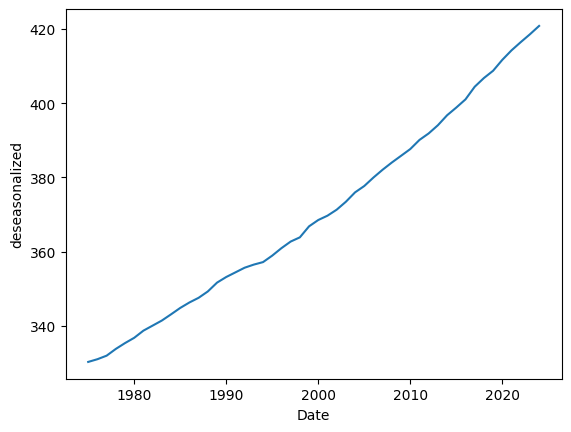

In [ ]:
# Membuat Lineplot dari variabel deseasonalized
sns.lineplot(data=df_resample, x=df_resample.index, y='deseasonalized')
plt.show()

Berdasarkan Plot di atas, kita dapat melihat bahwa variabel `deseasonalized` dari DataFrame df_resample bahwa rata-rata yang telah dihapuskan tren musiman atau fluktuasi untuk mengungkapkan tren jangka panjang terdapat peningkatan seiring berjalannya waktu.

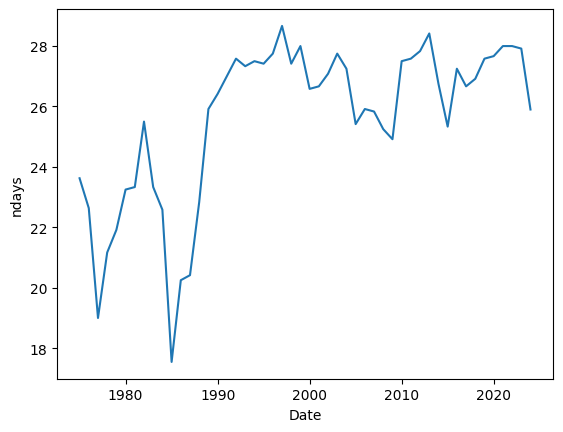

In [ ]:
# Membuat Lineplot dari variabel ndays
sns.lineplot(data=df_resample, x=df_resample.index, y='ndays')
plt.show()

Berdasarkan Plot di atas, kita dapat melihat bahwa variabel `ndays` dari DataFrame df_resample menunjukkan jumlah hari dalam perbulan yang digunakan dalam pengukuran CO2 mengalami kenaikan dan penurunan (Fluktuatif).

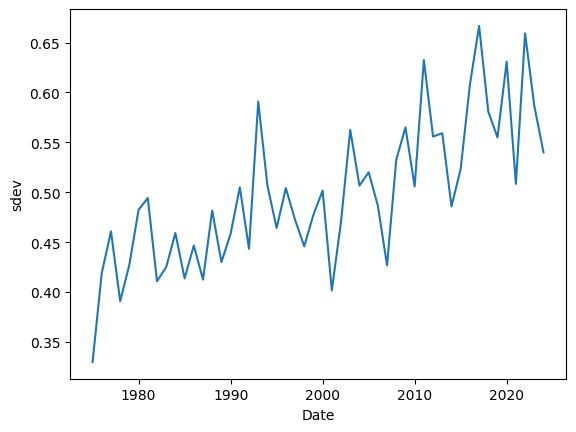

In [ ]:
#Membuat Lineplot dari sdev
sns.lineplot(data=df_resample, x=df_resample.index, y='sdev')
plt.show()

Berdasarkan Plot di atas, kita dapat melihat bahwa variabel `sdev` dari DataFrame df_resample menunjukkan simpangan baku pertahun dari perhitungan CO2 mengalami penurunan dan kenaikan (fluktuatif), tetapi jika dilihat dilihat dari plot diatas terdapat indikasi bahwa simpangan baku semakin bertambah seiring berjalannya waktu.

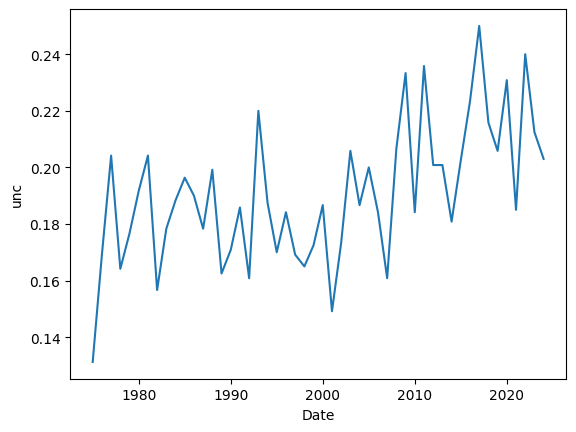

In [ ]:
#Membuat Lineplot dari variabel unc
sns.lineplot(data=df_resample, x=df_resample.index, y='unc')
plt.show()

Berdasarkan Plot di atas, kita dapat melihat bahwa variabel `unc` dari DataFrame df_resample menunjukkan uncertainty dalam pengukuran CO2 mengalami penurunan dan kenaikan (fluktuatif), tetapi jika dilihat dilihat dari plot diatas terdapat indikasi bahwa nilai unc semakin bertambah seiring berjalannya waktu.

# 4. Supervised Learning - Regression - Simple Linear Regression
#### Perform a simple linear regression using Year as the independent variable and CO2 Levels as the dependent variable

Mencari Persamaan Regresi Linear, R-score, dan P value.


*   R square merupakan suatu nilai yang memperlihatkan seberapa besar variabel independen mempengaruhi variabel dependen. R squared merupakan angka yang berkisar antara 0 sampai 1 yang mengindikasikan besarnya kombinasi variabel independen secara bersama – sama mempengaruhi nilai variabel dependen.([Source](https://accounting.binus.ac.id/2021/08/12/memahami-r-square-koefisien-determinasi-dalam-penelitian-ilmiah/))
*   Nilai P dikenal sebagai nilai probabilitas. Hal ini didefinisikan sebagai probabilitas untuk mendapatkan hasil yang sama atau lebih ekstrim dari observasi sebenarnya. Nilai P dikenal sebagai tingkat signifikansi marjinal dalam pengujian hipotesis yang mewakili kemungkinan terjadinya peristiwa tertentu. ([Source](https://byjus.com/maths/p-value/))




#### Decimal Date & Average

Mencari Persamaan Regresi Linear dari variavel independen  `decimal_date` dan Variabel dependen `average`.

In [ ]:
# Import modul stats dari pustaka SciPy
import scipy.stats as stats

# Mengecek Hasil Regresi Linear
result = stats.linregress(df['decimal_date'], df['average'])
print('Persamaan regresi linear: y =', str(result.slope) + 'x', '+(' + str(result.intercept) + ')')

# Mencetak Hasil R-Score
print('Nilai R-score: ', result.rvalue)

# Mencetak Hasil P-Value
print('Nilai P-value: ', result.pvalue)

Persamaan regresi linear: y = 1.626878852343521x +(-2880.570669225478)
Nilai R-score:  0.9881764548848572
Nilai P-value:  0.0


Mencari Persamaan Regresi Linear dari variavel independen  `decimal_date` dan Variabel dependen `average` dari data yang sudah diresample menjadi tahunan.

In [ ]:
result_resample = stats.linregress(df_resample['decimal_date'], df_resample['average'])
print('Persamaan regresi linear: y =', str(result_resample.slope) + 'x', '+ (' + str(result_resample.intercept) + ')')
print('Nilai R-score: ', result_resample.rvalue)
print('Nilai p-value: ', result_resample.pvalue)

Persamaan regresi linear: y = 1.833726911155144x + (-3295.157019886039)
Nilai R-score:  0.9949717162793996
Nilai p-value:  1.240838819561832e-49


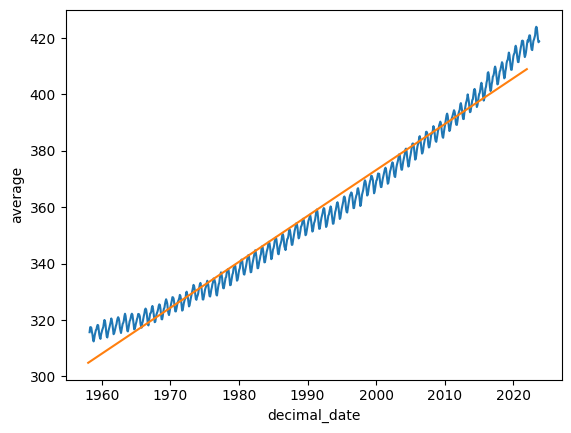

In [ ]:
import numpy as np

X = np.arange(1958, 2023)
Y = result.slope * X + result.intercept

sns.lineplot(data=df, x='decimal_date', y='average')
sns.lineplot(x=X, y=Y)
plt.show()

Pada Lineplot di atas menunjukkan garis yang bewarna oren (data prediksi) mengikuti pola garis biru (data asli) dengan baik  walaupun belum sempurna, ini menunjukkan bahwa model regresi linear Anda adalah model yang baik untuk menjelaskan hubungan antara variabel independen dan dependen.

#### Decimal Date & Deseasonalized

Mencari Persamaan Regresi Linear dari variavel independen  `decimal_date` dan Variabel dependen `deseasonalized`.

In [ ]:
# Mengecek Hasil Regresi Linear

result = stats.linregress(df['decimal_date'], df['deseasonalized'])
print('Persamaan regresi linear: y =', str(result.slope) + 'x', '+(' + str(result.intercept) + ')')

# Mencetak Hasil R-Score
print('Nilai R-score: ', result.rvalue)

# Mencetak Hasil P-Value
print('Nilai P-value: ', result.pvalue)

Persamaan regresi linear: y = 1.6276410342540488x +(-2882.0918912083444)
Nilai R-score:  0.9904320706260752
Nilai P-value:  0.0


Mencari Persamaan Regresi Linear dari variavel independen  `decimal_date` dan Variabel dependen `deseasonalized` dari data yang sudah diresample menjadi tahunan.

In [ ]:
result_resample = stats.linregress(df_resample['decimal_date'], df_resample['deseasonalized'])
print('Persamaan regresi linear: y =', str(result_resample.slope) + 'x', '+ (' + str(result_resample.intercept) + ')')
print('R-score: ', result_resample.rvalue)
print('p-value: ', result_resample.pvalue)

Persamaan regresi linear: y = 1.831563847806101x + (-3290.824077417322)
R-score:  0.9949389962397557
p-value:  1.4493169469193175e-49


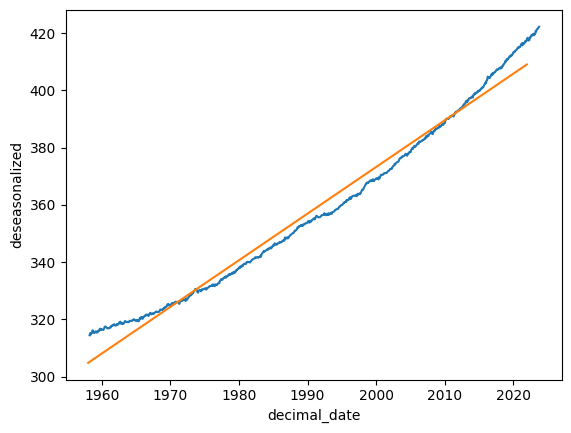

In [ ]:
import numpy as np

X = np.arange(1958, 2023)
Y = result.slope * X + result.intercept

sns.lineplot(data=df, x='decimal_date', y='deseasonalized')
sns.lineplot(x=X, y=Y)
plt.show()

Pada Lineplot di atas menunjukkan garis yang bewarna oren (data prediksi) mengikuti pola garis biru (data asli) dengan baik, ini menunjukkan bahwa model regresi linear Anda adalah model yang baik untuk menjelaskan hubungan antara variabel independen dan dependen.

Dapat Disimpulkan:


1.   Decimal Date & Average

        *   Sebelum Resample Per-tahun:

            - Persamaan regresi linear: y = 1.6260727271655053x +(-2878.9745222566976)
            
            - Nilai R-score:  0.9881517432292481
            
            - Nilai P-value:  0.0

        *   Setelah Resample Per-tahun:

            - Persamaan regresi linear: y = 1.8344677998631256x + (-3296.631558465864)
            
            - Nilai R-score:  0.9949199674344726
            - Nilai p-value:  1.5855793917267448e-49

      Dapat diketahui dari Variabel independen yaitu `decimal_date` dan Variabel dependen `average` persamaan Regresi Linear dari data yang sudah di resample menjadi tahunan dihasilkan Persamaan regresi linear: y = 1.8313540773683317x + (-3290.406413140802).

      Kemudian nilai R-Score pada data yang sudah diresample lebih tinggi, dihasilkan nilai sebesar 0.9949 (99,49%) dibandingkan dengan nilai R-Score sebelum diresample yaitu 0.9904 (99.04%), hal ini menunjukkan data setelah di resample menunjukkan model regresi variabelitas dalam data sangat baik.

      Dan P-value yang dihasilkan oleh data yang sudah di resample lebih kecil dibandingkan dengan data sebelum di resample. Pvalue menunjukkan nilai 1.3802128786428384e-49 dan lebih kecil dari alpha (0.05), maka H0 di tolak sehingga menunjukkan adanya hubungan yang signifikan antara variabel independen dan variabel dependen.

      Dapat disimpulkan hubungan antara `decimal_date` dan `average` terdapat hubungan yang sangat signifikan secara statisik hal ini dapat menggambarkan adanya pengaruh yang kuat pada waktu terhadap rata-rata yang lebih stabil atau tren jangka panjang dalam pada musim.


2.   Decimal Date & Deseasonalized

      *   Sebelum Resample Per-tahun:
          - Persamaan regresi linear: y = 1.6264439777660524x +(-2879.7216969974356)
          - Nilai R-score:  0.990450833625601
          - Nilai P-value:  0.0

      *   Setelah Resample Per-tahun:
          - Persamaan regresi linear: y = 1.8313540773683317x + (-3290.406413140802)
          - R-score:  0.99494931201147
          - p-value:  1.3802128786428384e-49

      Dapat diketahui dari Variabel independen yaitu `decimal_date` dan Variabel dependen `deseasonalized` persamaan Regresi Linear dari data yang sudah di resample menjadi tahunan dihasilkan Persamaan regresi linear: y = 1.8313540773683317x + (-3290.406413140802).

      Kemudian nilai R-Score pada data yang sudah diresample lebih tinggi, dihasilkan nilai sebesar 0.9949 (99,49%) dibandingkan dengan nilai R-Score sebelum diresample yaitu 0.9904 (99.04%), hal ini menunjukkan data setelah di resample menunjukkan model regresi variabelitas dalam data sangat baik.

      Dan P-value yang dihasilkan oleh data yang sudah di resample lebih kecil dibandingkan dengan data sebelum di resample. Pvalue menunjukkan nilai 1.3802128786428384e-49 dan lebih kecil dari alpha (0.05), maka H0 di tolak sehingga menunjukkan adanya hubungan yang signifikan antara variabel independen dan variabel dependen.

      Dapat disimpulkan hubungan antara `decimal_date` dan `deseasonalized` terdapat hubungan yang sangat signifikan secara statisik hal ini dapat menggambarkan adanya pengaruh yang kuat pada waktu terhadap rata-rata yang lebih stabil atau tren jangka panjang dalam pada musim.

    Diperoleh Nilai R-Score pada `decimal_date` terhadap `deseasonalized` lebih tinggi dibandingkan dengan R-Score pada `decimal_date` terhadap `average` dan Lineplot pada `decimal_date` dan `deseasonalized` lebih sempurna jika dibandingkan data pada `decimal_date` dan `average` yang menunjukkan terjadinya fluktuatif (tidak stabil). Sehingga waktu lebih berpengaruh terhadap rata-rata yang lebih stabil atau tren jangka panjang dalam pada musim.


Membuat Prediksi

In [ ]:
# Memprediksi deseasonalized berdasarkan tahun (year)
def forecast_deseasonalized(year):
    return result_resample.slope * year + result_resample.intercept

forecast_deseasonalized(2030)

427.25053362906283

Hasil Prediksi Rata - rata Deseasonalized pada tahun 2030 adalah 427.3380752562807

# 5. Unsupervised Learning - K-Means Clustering
#### If there are other climate-related variables in the dataset, use K-Means clustering to categorize years into different climate profiles.

In [ ]:
# Import Modul KMeans dan MinMaxScaler dari scikit-learn

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import time

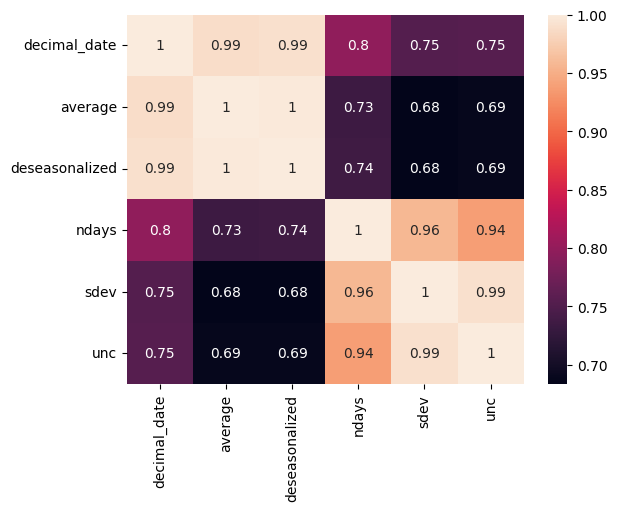

In [ ]:
# Membuat df resample
df_resample_corr =df_resample.corr()

# Membuat heatmap df resample
sns.heatmap(corr, annot=True)

# Menampilkan Plot
plt.show()

In [ ]:
# Eliminasi fitur yang berkorelasi tinggi

df_kmeans = df_resample[['ndays', 'sdev', 'unc']]
df_kmeans.head()

,ndays,sdev,unc
Date,,,
1974-12-31,23.625000,0.330000,0.131250
1975-12-31,22.636364,0.419091,0.169091
1976-12-31,19.000000,0.460833,0.204167
1977-12-31,21.166667,0.390833,0.164167
1978-12-31,21.916667,0.427500,0.176667


Menyetarakan nilai pada variabel `ndays`, `sdev`, dan `unc`.

In [ ]:
# Normalisasi data

scaler = MinMaxScaler()
data = scaler.fit_transform(df_kmeans.to_numpy())
df_scaled = pd.DataFrame(data, columns=list(df_kmeans.columns))

df_scaled.head()

,ndays,sdev,unc
0,0.546662,0.000000,0.000000
1,0.457766,0.264626,0.318660
2,0.130790,0.388614,0.614035
3,0.325613,0.180693,0.277193
4,0.393052,0.289604,0.382456


#### Elbow Method

Elbow Method merupakan metode grafis untuk mencari nilai K optimal dalam algoritma k-means clustering. Grafik elbow menunjukkan nilai-nilai dalam-cluster-sum-of-square (WCSS) pada sumbu y yang sesuai dengan nilai K yang berbeda (pada sumbu x). Nilai K optimal adalah titik dimana grafik membentuk siku.  


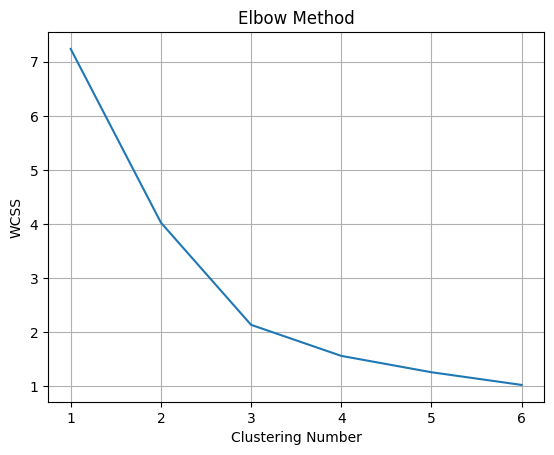

In [ ]:
# Ambil data dari df_scaled sebagai nilai dari variabel X
X = df_scaled

wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Clustering Number')
plt.ylabel('WCSS')

# Mengaktifkan tampilan grid pada plot
plt.grid(True)
plt.show()


In [ ]:
# Modelling K-Means clustering

kmeans = KMeans(3, n_init='auto')
kmeans.fit(df_scaled)

identified_clusters = kmeans.fit_predict(df_scaled)
identified_clusters

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2], dtype=int32)

In [ ]:
# Hasil akhir clustering

data_with_clusters = df_resample.copy()
data_with_clusters['cluster'] = identified_clusters
data_with_clusters

,decimal_date,average,deseasonalized,ndays,sdev,unc,cluster
Date,,,,,,,
1974-12-31,1974.666663,329.762500,330.346250,23.625000,0.330000,0.131250,1
1975-12-31,1975.458336,331.160909,331.074545,22.636364,0.419091,0.169091,1
1976-12-31,1976.500000,332.026667,332.027500,19.000000,0.460833,0.204167,1
1977-12-31,1977.500000,333.844167,333.844167,21.166667,0.390833,0.164167,1
1978-12-31,1978.500000,335.415000,335.415000,21.916667,0.427500,0.176667,1
1979-12-31,1979.500000,336.835000,336.835833,23.250000,0.482500,0.191667,1
1980-12-31,1980.500000,338.762500,338.765000,23.333333,0.494167,0.204167,1
1981-12-31,1981.500000,340.119167,340.120000,25.500000,0.410833,0.156667,0
1982-12-31,1982.500000,341.479167,341.477500,23.333333,0.425000,0.178333,1


Grafik membentuk siku tajam pada clustering number 3

Didapatkan Informasi tahun yang masuk kedalam kluster 0, 1, dan 2:
1. Untuk Cluster 0 :
  - Tahun 1992
  - Tahun 2002
  - Tahun 2004
  - Tahun 2007
  - Tahun 2008
  - Tahun 2010
  - Tahun 2011
  - Tahun 2012
  - Tahun 2014
  - Tahun 2015
  - Tahun 2016
  - Tahun 2017
  - Tahun 2018
  - Tahun 2019
  - Tahun 2021
  - Tahun 2022
  - Tahun 2023

2. Untuk Cluster 1 :
  - Tahun 1974
  - Tahun 1981
  - Tahun 1988
  - Tahun 1989
  - Tahun 1990
  - Tahun 1991
  - Tahun 1993
  - Tahun 1994
  - Tahun 1995
  - Tahun 1996
  - Tahun 1997
  - Tahun 1998
  - Tahun 1999
  - Tahun 2000
  - Tahun 2001
  - Tahun 2003
  - Tahun 2005
  - Tahun 2006
  - Tahun 2009
  - Tahun 2013
  - Tahun 2020


3. Untuk Cluster 2 :
  - Tahun 1975
  - Tahun 1976
  - Tahun 1977
  - Tahun 1978
  - Tahun 1979
  - Tahun 1980
  - Tahun 1982
  - Tahun 1983
  - Tahun 1984
  - Tahun 1985
  - Tahun 1986
  - Tahun 1987


In [ ]:
# Melakukan Encoding
train = pd.get_dummies(df_resample)

In [ ]:
# Melakukan Scalling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train)

In [ ]:
# Extract hasil
train['cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_

# Ubah 3 menjadi jumlah kolom yang sesuai
centroids_df = pd.DataFrame(centroids, columns=train.columns[:3])
centroids_df['cluster'] = 'centroid'
all_df = pd.concat([train, centroids_df])

In [ ]:
# Menampung setiap baris data ke dalam kluster yang sesuai, dan baris hasil kluster tersebut akan disimpan dalam sebuah variabel.
cluster0 = train[train['cluster'] == 0]
cluster1 = train[train['cluster'] == 1]
cluster2 = train[train['cluster'] == 2]

In [ ]:
# Mencari Informasi mengenai cluster 0
cluster0.describe()

,decimal_date,average,deseasonalized,ndays,sdev,unc,cluster
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
mean,1998.900000,368.599417,368.599042,27.037500,0.470625,0.173792,0.0
std,9.224681,17.245042,17.245054,0.833980,0.034439,0.011808,0.0
min,1981.500000,340.119167,340.120000,25.500000,0.401667,0.149167,0.0
25%,1993.000000,356.837292,356.836250,26.541667,0.445208,0.164375,0.0
50%,1998.000000,365.358333,365.357917,27.166667,0.475000,0.172917,0.0
75%,2004.000000,376.983125,376.983125,27.520833,0.504375,0.184375,0.0
max,2020.500000,414.210833,414.210833,28.666667,0.508333,0.187500,0.0


In [ ]:
# Mencari Informasi mengenai cluster 1
cluster1.describe()

,decimal_date,average,deseasonalized,ndays,sdev,unc,cluster
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0
mean,1980.972610,339.257698,339.314414,21.683858,0.434120,0.182439,1.0
std,4.336803,6.635795,6.593063,1.893253,0.044403,0.019988,0.0
min,1974.666663,329.762500,330.346250,17.545455,0.330000,0.131250,1.0
25%,1977.500000,333.844167,333.844167,20.416667,0.413636,0.176667,1.0
50%,1980.500000,338.762500,338.765000,22.583333,0.427500,0.188333,1.0
75%,1984.518936,344.640000,344.879091,23.250000,0.460833,0.196364,1.0
max,1987.500000,349.311667,349.314167,23.625000,0.494167,0.204167,1.0


In [ ]:
# Mencari Informasi mengenai cluster 2
cluster2.describe()

,decimal_date,average,deseasonalized,ndays,sdev,unc,cluster
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,2012.906863,396.525088,396.508559,26.925490,0.580490,0.216892,2.0
std,8.086870,17.457818,17.433431,1.127052,0.045329,0.015960,0.0
min,1992.500000,356.545833,356.545833,24.916667,0.520000,0.200000,2.0
25%,2008.500000,385.831667,385.831667,25.900000,0.555000,0.203000,2.0
50%,2014.500000,398.812500,398.812500,27.333333,0.565000,0.212500,2.0
75%,2018.500000,408.715000,408.715833,27.750000,0.607500,0.230833,2.0
max,2023.416670,421.064000,420.783000,28.416667,0.666667,0.250000,2.0


Didapatkan Informasi dari Cluster 0, 1, dan 2:

1.  Mean dari variabel `Average` (Rata - rata Level CO2 perbulan)
    * Mean Cluster 0: 396.539755
    * Mean Cluster 1: 366.750040
    * Mean Cluster 2: 340.048895

2.   Mean dari variabel `Deseasonalizes` (Rata - rata musiman yang lebih stabil)
    * Mean Cluster 0: 396.499216
    * Mean Cluster 1: 366.777480
    * Mean Cluster 2: 340.061692

3.   Mean dari variabel `Ndays` (Number of Days Observed)
    * Mean Cluster 0: 26.918301
    * Mean Cluster 1: 26.875000
    * Mean Cluster 2: 21.522096

4.   Mean dari variabel `sdev` (Standard Deviation of Number of Days)
    * Mean Cluster 0: 0.581144
    * Mean Cluster 1: 0.463929
    * Mean Cluster 2: 0.442797

5.   Mean dari variabel `unc` (Uncertainty of Monthly Mean)
    * Mean Cluster 0: 0.217108
    * Mean Cluster 1: 0.171766
    * Mean Cluster 2: 0.186705